<div style="font-size:18pt; padding-top:20px; text-align:center">Домашнее задание А1. <b>Индекс реальной зарплаты</b></div><hr>
<div style="text-align:right;">Поляков А.А. <span style="font-style: italic;font-weight: bold;">(группа ИУ6-21М)</span></div>

Подключение стилей оформления

In [2]:
%%html
<link href="css/style.css" rel="stylesheet" type="text/css">

### Вариант 9  <span style="font-style: italic;"> - Дальневосточный регион</span>


In [26]:
surname = "Поляков"  # Ваша фамилия

alph = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [6, 31, 38, 29, 29, 20, 16,  4, 34,  3, 39, 33, 36, 33, 20,  3, 22,
       31,  3, 34, 16, 25, 25, 25, 23, 13, 35, 19, 20, 26, 34, 39,  8]
d = dict(zip(alph, w))
variant =  sum([d[el] for el in surname.lower()]) % 9 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  9


In [13]:
import pandas as pnd
import numpy as np

<p>Создание DataFrame из Excel файла</p>

In [77]:
filePath1 = r"C:/Users/Yoda/Desktop/Assignments-master/data/A1_Analytics/V1_Nom_Salary_By_Regions.xlsx"
filePath2 = r"C:/Users/Yoda/Desktop/Assignments-master/data/A1_Analytics/V1_Index_Price_By_Year.xls" 

# Создание DataFrame из Excel файла
#header=1 - номер строка с названиями столбцов
#skiprows=10 - при чтении файла пропускаются первые n строк 
dfNomSalaryBtRegions = pnd.read_excel(filePath1, header=0, skiprows=4)
dfPriceByYear = pnd.read_excel(filePath2, header=0, skiprows=1)


df1 = dfNomSalaryBtRegions.loc[91-6] #данные по Дальневосточному региону (индекс номинальной зарплаты)
df2 = dfPriceByYear.loc[42-3]        #данные по Дальневосточному региону (индекс потребительских цен)  
df2

Unnamed: 0    Дальневосточный федеральный округ
2002                                        NaN
2003                                        NaN
2004                                        NaN
2005                                        NaN
2006                                     110,57
2007                                     108,29
2008                                     112,69
2009                                     112,87
2010                                     106,66
2011                                     107,75
2012                                     105,29
2013                                     106,53
2014                                     107,23
2015                                      114,5
Name: 39, dtype: object

<p><b>Задача 1.</b> Найти индексы номинальной заработной платы, построить график изменения индекса в процентах (год-изменение индекса в %) </p>

In [15]:
indxs1 = [] # Массив из индексов номинальной заработной платы
for i in range(2002,2015):
    indxs1.append(df1[i]/df1[i-1]*100)

In [16]:
# Структура вывода
df_result_1 = pnd.DataFrame( indxs1[1:13], 
                            columns = ["Индекс номинальной зарплаты"], 
                            index = range(2003, 2015))

df_result_1

,Индекс номинальной зарплаты
2003,126.351792
2004,120.656015
2005,126.249561
2006,119.147716
2007,121.891273
2008,124.324179
2009,111.451851
2010,111.470865
2011,113.579735
2012,114.544146


<p>График изменения индекса в процентах (год-изменение индекса в %)</p> 


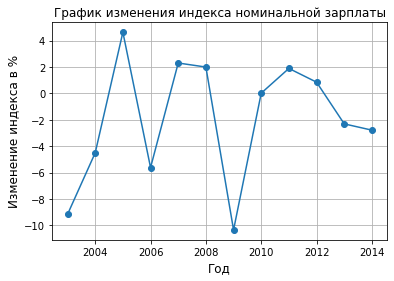

In [76]:
chindxs1 = [] # Массив изменения индекса в %
for i in range(0,12):
    chindxs1.append(indxs1[i+1]/indxs1[i]*100-100)
    
import matplotlib.pyplot as plt
#x = [2003, 2004, 2005]
x = np.arange(start=2003, stop=2015, step=1)

plt.figure("4")
plt.title("График изменения индекса номинальной зарплаты")
plt.plot(x, chindxs1, "-o")

plt.xlabel("Год", fontsize=12)
plt.ylabel("Изменение индекса в %", fontsize=12)
plt.grid(True)
plt.show()

<p><b>Задача 2.</b> Построить график изменения индекса потребительских цен в процентах (год-изменение индекса в %) </p>

In [18]:
indxs2 = []                                          # Массив из индексов потребительских цен
for i in range(2006,2015):                           #данные за 2003 - 2005 год отсутствуют
    indxs2.append(float(df2[i].replace(',','.')))    #замена символа "," в данных на "."

df_result_2 = pnd.DataFrame(indxs2[0:9], 
                            columns = ["Индекс потребительских цен"], 
                            index = range(2006, 2015))  

df_result_2

,Индекс потребительских цен
2006,110.57
2007,108.29
2008,112.69
2009,112.87
2010,106.66
2011,107.75
2012,105.29
2013,106.53
2014,107.23


<p>График изменения индекса в процентах (год-изменение индекса в %)</p> 


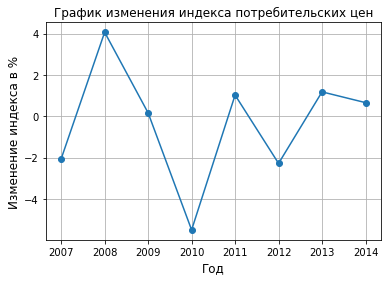

In [73]:
chindxs2 = [] # Массив изменения индекса в %
for i in range(0,8):
    chindxs2.append(float(indxs2[i+1])/float(indxs2[i])*100-100)

x = np.arange(start=2007, stop=2015, step=1) #данные за 2003 - 2005 год отсутствуют

plt.figure("4")
plt.title("График изменения индекса потребительских цен")
plt.plot(x, chindxs2, "-o")

plt.xlabel("Год", fontsize=12)
plt.ylabel("Изменение индекса в %", fontsize=12)
plt.grid(True)
plt.show()

<p><b>Задача 3.</b> Найти индексы реальной заработной платы, построить график изменения индекса в процентах (год-изменение индекса в %) </p>

In [20]:
indxs3 = []                                          # Массив из индексов реальных цен
for i in range(0,9):                                 
    indxs3.append(float(indxs1[i+4]/indxs2[i])*100)    

In [22]:
df_result_3 = pnd.DataFrame(indxs3[0:9], 
                            columns = ["Индекс реальной зарплаты"], 
                            index = range(2006, 2015))  # данные потребительских цен за 2003 - 2005 год отсутствуют

df_result_3

,Индекс реальной зарплаты
2006,107.757724
2007,112.560045
2008,110.324056
2009,98.743556
2010,104.510468
2011,105.410427
2012,108.789198
2013,105.036093
2014,101.439985


<p>График изменения индекса в процентах (год-изменение индекса в %)</p> 


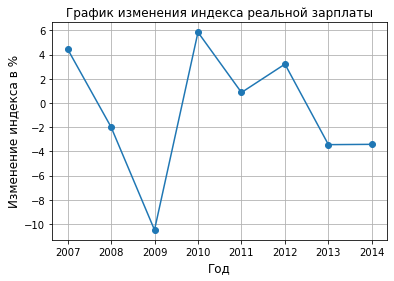

In [70]:
chindxs3 = [] # Массив изменения индекса в %
for i in range(0,8):
    chindxs3.append(float(indxs3[i+1])/float(indxs3[i])*100-100)

x = np.arange(start=2007, stop=2015, step=1) #данные за 2003 - 2005 год отсутствуют

plt.figure("4")
plt.title("График изменения индекса реальной зарплаты")
plt.grid(True)
plt.plot(x, chindxs3, "-o")

plt.xlabel("Год", fontsize=12)
plt.ylabel("Изменение индекса в %", fontsize=12)
plt.show()

<p><b>Задача 4.</b> Отобразить все три индекса на одном графике</p>

In [48]:
#Структура вывода
df_result_4 = pnd.DataFrame([[indxs1[4], indxs2[0], indxs3[0]],
                            [indxs1[5], indxs2[1], indxs3[1]],
                            [indxs1[6], indxs2[2], indxs3[2]],
                            [indxs1[7], indxs2[3], indxs3[3]],
                            [indxs1[8], indxs2[4], indxs3[4]],
                            [indxs1[9], indxs2[5], indxs3[5]],
                            [indxs1[10], indxs2[6], indxs3[6]],
                            [indxs1[11], indxs2[7], indxs3[7]],
                            [indxs1[12], indxs2[8], indxs3[8]]],
                            columns = ["Индекс номинальной зарплаты", 
                                       "Индекс потребительских цен", 
                                       "Индекс реальной зарплаты"], 
                            index = range(2006, 2015))

df_result_4

,Индекс номинальной зарплаты,Индекс потребительских цен,Индекс реальной зарплаты
2006,119.147716,110.57,107.757724
2007,121.891273,108.29,112.560045
2008,124.324179,112.69,110.324056
2009,111.451851,112.87,98.743556
2010,111.470865,106.66,104.510468
2011,113.579735,107.75,105.410427
2012,114.544146,105.29,108.789198
2013,111.894950,106.53,105.036093
2014,108.774096,107.23,101.439985


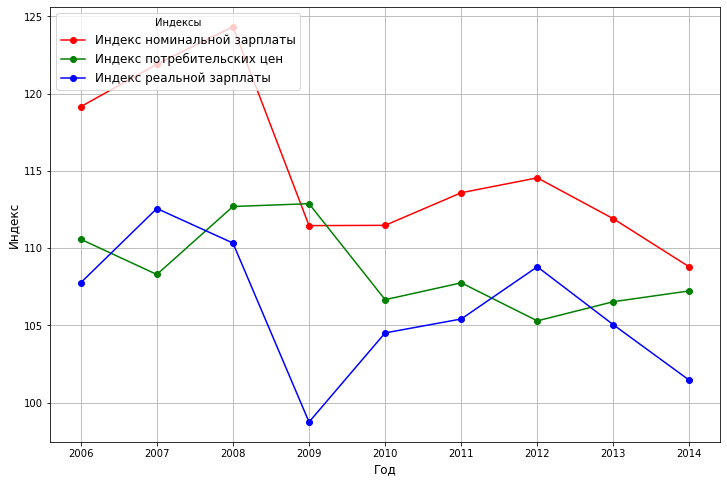

In [66]:
x = np.arange(start=2006, stop=2015, step=1) # данные потребительских цен за 2003 - 2005 год отсутствуют

plt.figure("4", figsize=[12, 8])
plt.plot(x, indxs1[4:13], "-ro", label="Индекс номинальной зарплаты")
plt.plot(x, indxs2[0:9], "-go", label="Индекс потребительских цен")
plt.plot(x, indxs3[0:9], "-bo", label="Индекс реальной зарплаты")

plt.grid(True)
plt.legend(loc=2, title="Индексы", fontsize=12)

plt.xlabel("Год", fontsize=12)
plt.ylabel("Индекс", fontsize=12)


plt.show()

<div style="font-size:18pt; padding-top:20px; text-align:center">Домашнее задание А1. <b>Дескриптивный анализ данных</b></div><hr>

### Вариант 


In [2]:
surname = "Поляков"  # Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [1, 42, 21, 21, 34,  6, 44, 26, 18, 44, 38, 26, 14, 43,  4, 49, 45,
        7, 42, 29,  4,  9, 36, 34, 31, 29,  5, 30,  4, 19, 28, 25, 33]

d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 40 + 1

print("Задача № 1, шаг 5 - вариант: ", variant % 5 + 1)
print("Задача № 1, шаг 11 - вариант: ", variant % 2 + 1 )
print("задача № 2 - вариант: ", variant % 4 + 1)

Задача № 1, шаг 5 - вариант:  4
Задача № 1, шаг 11 - вариант:  1
задача № 2 - вариант:  3


<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">Задание</div>
    </div>
</div>

<p><b>Задача 1.</b> Анализ индекса восприятия коррупции (Corruption Perceptions Index, CPI)</p>

<p>1. Подключите библиотеки numpy, pandas, matplotlib</p>

In [3]:
import numpy as np
import pandas as pnd
import matplotlib.pyplot as plt

<p>2. Загрузите данные из "data/CPI2019.xlsx" в DataFrame. Исходные данные и пояснения можно найти <a href="https://www.transparency.org/cpi2019">здесь</a></p>

In [5]:
filePath1 = r"C:\Users\Yoda\Desktop\Assignments-master\data\A1_Descriptive_Analysis\newdata\CPI2020_GlobalTablesTS_210125.xlsx"
df = pnd.read_excel(filePath1, header=0, skiprows=2)
df

,Country,ISO3,Region,CPI score 2020,Rank 2020,Sources 2020,Standard error 2020,CPI score 2019,Rank 2019,Sources 2019,...,Standard error 2015,CPI score 2014,Sources 2014,Standard error 2014,CPI Score 2013,Sources 2013,Standard error 2013,CPI Score 2012,Sources 2012,Standard error 2012
0,Denmark,DNK,WE/EU,88,1,8,1.775809,87,1,8,...,2.16,92.0,7.0,2.04,91.0,7.0,2.2,90.0,7.0,2.0
1,New Zealand,NZL,AP,88,1,8,1.479342,87,1,8,...,2.32,91.0,7.0,2.28,91.0,7.0,2.3,90.0,7.0,2.2
2,Finland,FIN,WE/EU,85,3,8,1.748594,86,3,8,...,1.77,89.0,7.0,2.05,89.0,7.0,1.7,90.0,7.0,3.0
3,Singapore,SGP,AP,85,3,9,1.203239,85,4,9,...,2.02,84.0,8.0,1.75,86.0,9.0,2.3,87.0,9.0,2.1
4,Sweden,SWE,WE/EU,85,3,8,1.303953,85,4,8,...,1.71,87.0,7.0,3.41,89.0,7.0,2.3,88.0,7.0,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Venezuela,VEN,AME,15,176,8,0.914430,16,173,8,...,2.64,19.0,7.0,1.69,20.0,7.0,2.3,19.0,7.0,2.1
176,Yemen,YEM,MENA,15,176,7,1.333599,15,177,7,...,2.66,19.0,6.0,2.37,18.0,6.0,2.6,23.0,6.0,2.2
177,Syria,SYR,MENA,14,178,5,1.576392,13,178,5,...,5.66,20.0,4.0,5.31,17.0,4.0,3.8,26.0,5.0,2.7
178,Somalia,SOM,SSA,12,179,6,2.292273,9,180,5,...,2.32,8.0,4.0,2.34,8.0,4.0,1.9,8.0,4.0,2.3


<p>3. Отсортируйте данные по убыванию индекса DataFrame</p>

In [6]:
df.sort_values("CPI score 2020", ascending=0)

,Country,ISO3,Region,CPI score 2020,Rank 2020,Sources 2020,Standard error 2020,CPI score 2019,Rank 2019,Sources 2019,...,Standard error 2015,CPI score 2014,Sources 2014,Standard error 2014,CPI Score 2013,Sources 2013,Standard error 2013,CPI Score 2012,Sources 2012,Standard error 2012
0,Denmark,DNK,WE/EU,88,1,8,1.775809,87,1,8,...,2.16,92.0,7.0,2.04,91.0,7.0,2.2,90.0,7.0,2.0
1,New Zealand,NZL,AP,88,1,8,1.479342,87,1,8,...,2.32,91.0,7.0,2.28,91.0,7.0,2.3,90.0,7.0,2.2
2,Finland,FIN,WE/EU,85,3,8,1.748594,86,3,8,...,1.77,89.0,7.0,2.05,89.0,7.0,1.7,90.0,7.0,3.0
4,Sweden,SWE,WE/EU,85,3,8,1.303953,85,4,8,...,1.71,87.0,7.0,3.41,89.0,7.0,2.3,88.0,7.0,1.9
5,Switzerland,CHE,WE/EU,85,3,7,1.096633,85,4,7,...,2.55,86.0,6.0,2.61,85.0,6.0,2.5,86.0,6.0,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Venezuela,VEN,AME,15,176,8,0.914430,16,173,8,...,2.64,19.0,7.0,1.69,20.0,7.0,2.3,19.0,7.0,2.1
176,Yemen,YEM,MENA,15,176,7,1.333599,15,177,7,...,2.66,19.0,6.0,2.37,18.0,6.0,2.6,23.0,6.0,2.2
177,Syria,SYR,MENA,14,178,5,1.576392,13,178,5,...,5.66,20.0,4.0,5.31,17.0,4.0,3.8,26.0,5.0,2.7
178,Somalia,SOM,SSA,12,179,6,2.292273,9,180,5,...,2.32,8.0,4.0,2.34,8.0,4.0,1.9,8.0,4.0,2.3


<div><p>4. Отобразите данные по индексу CPI за 2019 год в виде горизонтального столбчатого графика. Примерный вид графика приведен ниже</p>
<img src="img/cpi_2016_.png"></div>

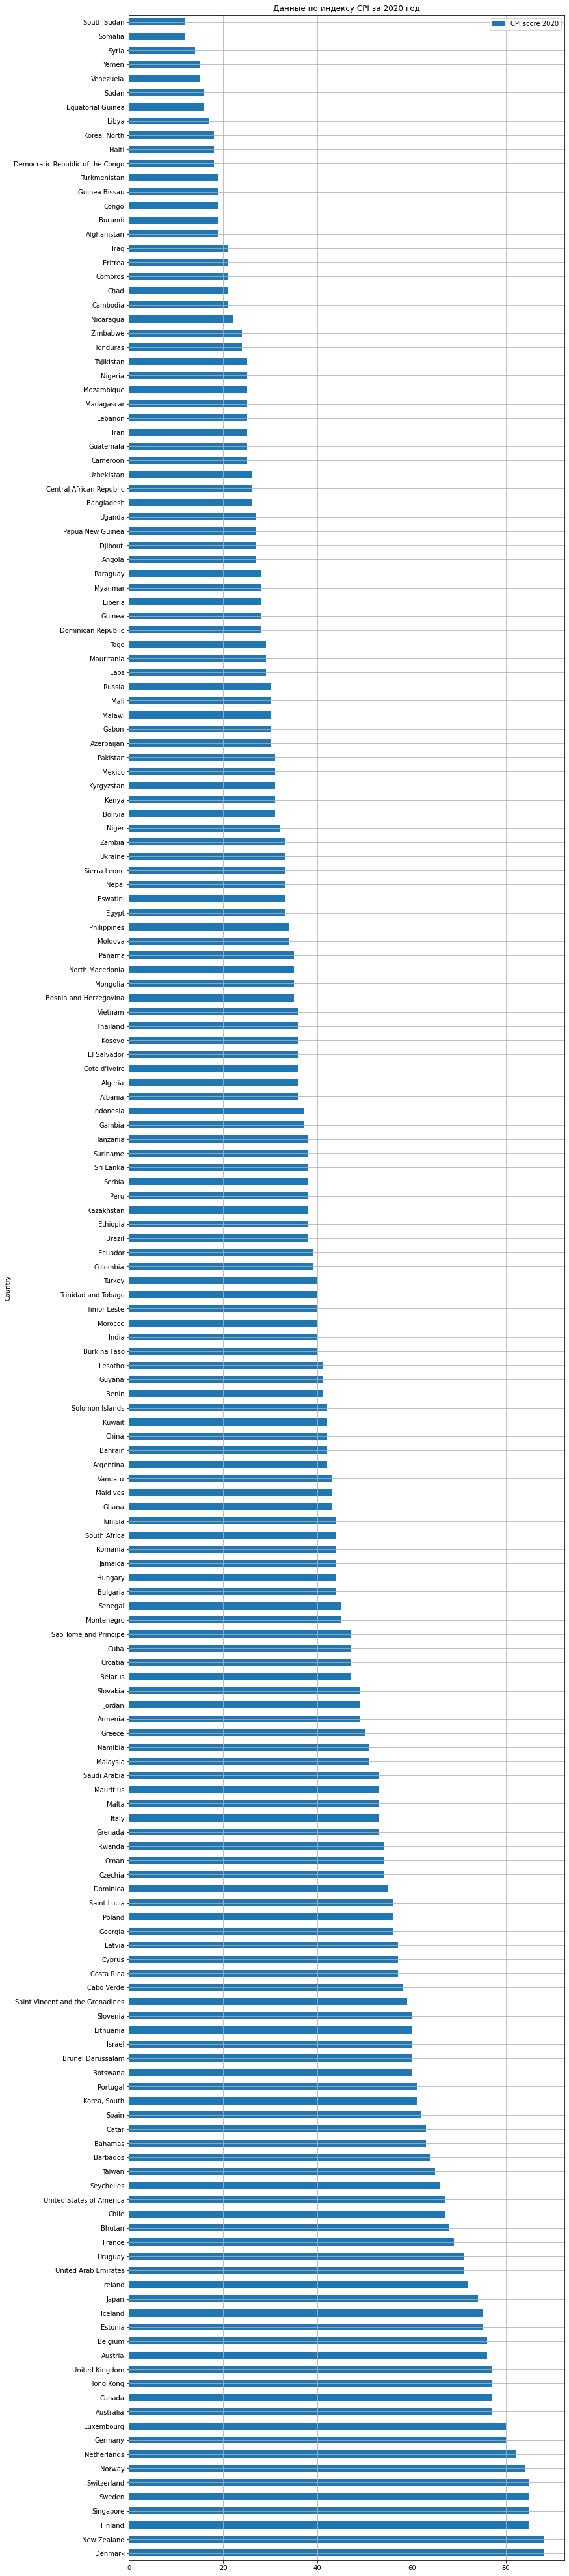

In [7]:
df1 = pnd.DataFrame({'Country': df["Country"], 'CPI score 2020': df["CPI score 2020"]})
ax = df1.plot(x='Country', y='CPI score 2020', figsize=[12,72], kind = 'barh', title = 'Данные по индексу CPI за 2020 год', grid = True, layout = 'Country')

<p>5. Сформируйте DataFrame из исходного для региона в соответствии с Вашим вариантом</p>
<p><b>Вариант 4.</b> Middle East and North Africa</p>

In [8]:
df2 = df[df["Region"]=='MENA']
dfRussia = df[df["Country"]=='Russia'] #данные по России


<p>6. Выведите данные DataFrame'a</p>

In [9]:
df2

,Country,ISO3,Region,CPI score 2020,Rank 2020,Sources 2020,Standard error 2020,CPI score 2019,Rank 2019,Sources 2019,...,Standard error 2015,CPI score 2014,Sources 2014,Standard error 2014,CPI Score 2013,Sources 2013,Standard error 2013,CPI Score 2012,Sources 2012,Standard error 2012
20,United Arab Emirates,ARE,MENA,71,21,8,3.226185,71,21,8,...,5.07,70.0,7.0,5.14,69.0,7.0,4.7,68.0,7.0,4.3
30,Qatar,QAT,MENA,63,30,7,5.346540,62,30,7,...,6.63,69.0,6.0,7.21,68.0,6.0,7.2,68.0,6.0,6.4
36,Israel,ISR,MENA,60,35,7,1.338424,60,35,7,...,2.78,60.0,6.0,2.34,61.0,6.0,1.6,60.0,5.0,2.9
49,Oman,OMN,MENA,54,49,6,7.472544,52,56,6,...,6.69,45.0,5.0,6.55,47.0,5.0,7.8,47.0,5.0,7.6
55,Saudi Arabia,SAU,MENA,53,52,7,5.361357,53,51,7,...,7.03,49.0,5.0,6.69,46.0,5.0,6.7,44.0,5.0,6.4
60,Jordan,JOR,MENA,49,60,8,2.201044,48,60,8,...,3.00,49.0,7.0,2.87,45.0,7.0,2.4,48.0,7.0,3.1
73,Tunisia,TUN,MENA,44,69,7,2.827469,43,74,7,...,2.17,40.0,6.0,1.72,41.0,7.0,1.9,41.0,7.0,2.8
78,Bahrain,BHR,MENA,42,78,6,5.914723,42,77,6,...,7.86,49.0,5.0,6.11,48.0,5.0,5.4,51.0,5.0,4.1
80,Kuwait,KWT,MENA,42,78,6,1.882920,40,85,6,...,4.51,44.0,5.0,5.24,43.0,5.0,3.9,44.0,5.0,3.9
87,Morocco,MAR,MENA,40,86,7,2.215573,41,80,7,...,3.85,39.0,6.0,3.57,37.0,8.0,2.9,37.0,8.0,3.2


<div><p>7. Постройте графики индекса CPI за 2012-2019 для стран своего региона. Примерный вид графика приведен ниже</p>
<img src="img/fig_springfield_region.png">
</div>

In [10]:
#df2.loc[20, "Country"]
mas7 = [0, 3, 7, 11, 15, 19, 22, 25, 28, 31]
df7 = df2.iloc[0:len(df2), mas7]
df10R = dfRussia.iloc[0, mas7]    #данные по CPI score за 2012-2020 годы для России

#данные по CPI score за 2012-2020 годы
df7


,Country,CPI score 2020,CPI score 2019,CPI score 2018,CPI score 2017,CPI score 2016,CPI score 2015,CPI score 2014,CPI Score 2013,CPI Score 2012
20,United Arab Emirates,71,71,70,71,66.0,70.0,70.0,69.0,68.0
30,Qatar,63,62,62,63,61.0,71.0,69.0,68.0,68.0
36,Israel,60,60,61,62,64.0,61.0,60.0,61.0,60.0
49,Oman,54,52,52,44,45.0,45.0,45.0,47.0,47.0
55,Saudi Arabia,53,53,49,49,46.0,52.0,49.0,46.0,44.0
60,Jordan,49,48,49,48,48.0,53.0,49.0,45.0,48.0
73,Tunisia,44,43,43,42,41.0,38.0,40.0,41.0,41.0
78,Bahrain,42,42,36,36,43.0,51.0,49.0,48.0,51.0
80,Kuwait,42,40,41,39,41.0,49.0,44.0,43.0,44.0
87,Morocco,40,41,43,40,37.0,36.0,39.0,37.0,37.0


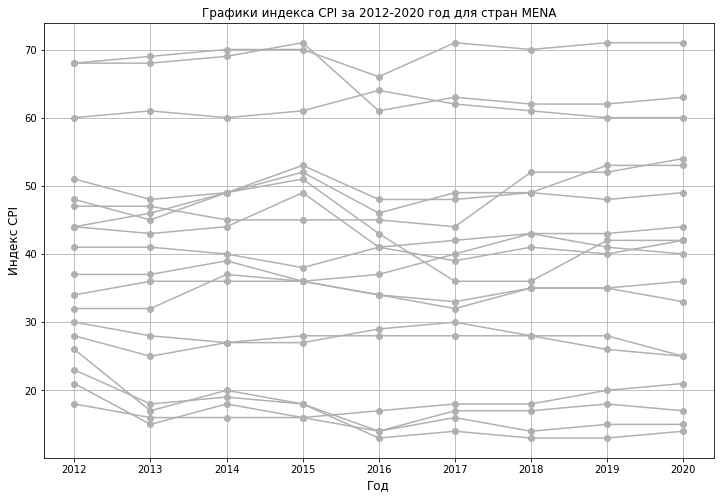

In [11]:
plt.figure("4", figsize=[12, 8])
plt.title("Графики индекса CPI за 2012-2020 год для стран MENA")

for i in range(0,len(df7)):
    plt.plot(range(2012,2021), df7.iloc[i,1:10].iloc[::-1], color='#b0b0b0', marker = 'o')

#plt.plot(range(2012,2021), df7.mean(axis=0)[0:18]   , color='green', marker = 'o')    
    
plt.xlabel("Год", fontsize=12)
plt.ylabel("Индекс CPI", fontsize=12)
plt.grid(True)


<p>8. Найдите страны с наибольшим и наименьшим значением CPI Вашего варианта региона за 2020 год</p>

In [12]:
df8 = df7.iloc[0:len(df7),0:2] # df8["CPI score 2020"].max()
df8[df8["CPI score 2020"]>=df8["CPI score 2020"].max()]


,Country,CPI score 2020
20,United Arab Emirates,71


In [13]:
df8[df8["CPI score 2020"]<=df8["CPI score 2020"].min()]

,Country,CPI score 2020
177,Syria,14


<p>9. Определите средние значения за каждый год в период с 2012 по 2020</p>

In [14]:
df9 = df7.mean(axis=0) 
df9

CPI score 2020    39.111111
CPI score 2019    39.000000
CPI score 2018    38.555556
CPI score 2017    37.888889
CPI score 2016    37.500000
CPI score 2015    40.055556
CPI score 2014    39.666667
CPI Score 2013    38.444444
CPI Score 2012    40.000000
dtype: float64

<div><p>10. Постройте графики индекса CPI за 2012-2020 для стран своего региона и выделите страны с наибольшим и наименьшим значением CPI за 2020 год, а также постройте графики для средних значение по региону и РФ. Примерный вид графика приведен ниже</p>
<img src="img/fig_springfield_region_comb.png">
</div>

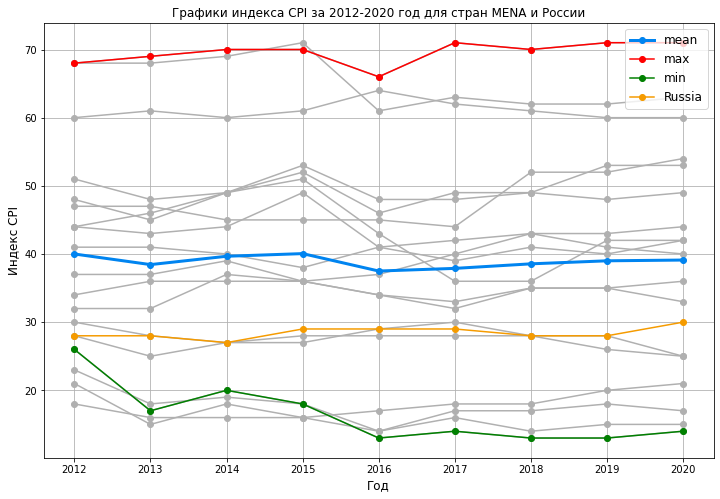

In [15]:
plt.figure("4", figsize=[12, 8])
plt.title("Графики индекса CPI за 2012-2020 год для стран MENA и России")

for i in range(0,len(df7)):
    plt.plot(range(2012,2021), df7.iloc[i,1:10].iloc[::-1], color='#b0b0b0', marker = 'o')

plt.plot(range(2012,2021), df7.mean(axis=0).iloc[::-1], color='#0084f0', marker = 'o', lw = 3, label="mean") #Среднее значение  
plt.plot(range(2012,2021), df7[df7["CPI score 2020"]>=df7["CPI score 2020"].max()].iloc[0,1:10].iloc[::-1], color='red', marker = 'o', label="max") #Макс. значение  
plt.plot(range(2012,2021), df7[df7["CPI score 2020"]<=df7["CPI score 2020"].min()].iloc[0,1:10].iloc[::-1], color='green', marker = 'o', label="min") #Мин. значение 
plt.plot(range(2012,2021), df10R[1:10].iloc[::-1], color='#f59b00', marker = 'o', label="Russia") #Данные по России      

plt.legend(loc=1, fontsize=12)
plt.xlabel("Год", fontsize=12)
plt.ylabel("Индекс CPI", fontsize=12)
plt.grid(True)

<p>11. Определите как изменилось значение показателя в соответствии с Вашим вариантом с 2012 по 2020</p>
<p><b>Вариант 1.</b> На сколько позиций в рейтинге c 2017 по 2020 (данные по рейтингу до 2017 года отсутствуют)</p>

<p>12. Выведите </p>

In [17]:
import pandas as pnd

index = ["mean_2020", "max_2020", "min_2020", "Russia_2020"]
columns = ["Region", "Country", "Score 2012", "Score 2020", "Change in position since 2017"]

In [18]:
maxx = df7[df7["CPI score 2020"]>=df7["CPI score 2020"].max()]
minn = df7[df7["CPI score 2020"]<=df7["CPI score 2020"].min()]
mean = df7.mean(axis=0)

df12 = df2.iloc[0:len(df2), [0, 4, 16]] #позиция в рейтинге 2017, 2020 (данные до 2017 отсутствуют)
df12R = dfRussia.iloc[0, [0, 4, 16]]    
df12max_2020 = df12[df12["Country"]==maxx.iloc[0,0]].iloc[0,1]  #позиция в рейтинге 2020 года
df12min_2020 = df12[df12["Country"]==minn.iloc[0,0]].iloc[0,1]  #позиция в рейтинге 2020 года
df12max_2017 = df12[df12["Country"]==maxx.iloc[0,0]].iloc[0,2]  #позиция в рейтинге 2017 года
df12min_2017 = df12[df12["Country"]==minn.iloc[0,0]].iloc[0,2]  #позиция в рейтинге 2017 года

mean2020 = df[df["CPI score 2020"]<=mean.iloc[0]].loc[101, "Rank 2020"] #позиция в рейтинге 2020 года с рейтингом <= mean
mean2017 = df[df["CPI score 2020"]<=mean.iloc[3]].loc[101, "Rank 2017"] #позиция в рейтинге 2017 года с рейтингом <= mean

columns = ["Region", "Country", "Score 2012", "Score 2020", "Change in position since 2017"]
df = pnd.DataFrame([['-', '-', mean.iloc[0], mean.iloc[8], mean2017 - mean2020], 
                   ['MENA', maxx.iloc[0,0], maxx.iloc[0,9], maxx.iloc[0,1], df12max_2017 - df12max_2020], 
                   ['MENA', minn.iloc[0,0], minn.iloc[0,9], minn.iloc[0,1], df12min_2017 - df12min_2020], 
                   ['ECA', df10R[0], df10R[9], df10R[1], df12R[2] - df12R[1]]], index=index, columns=columns)
df

,Region,Country,Score 2012,Score 2020,Change in position since 2017
mean_2020,-,-,39.111111,40.0,28
max_2020,MENA,United Arab Emirates,68.000000,71.0,0
min_2020,MENA,Syria,26.000000,14.0,0
Russia_2020,ECA,Russia,28.000000,30.0,6
